<a href="https://colab.research.google.com/github/snehavyshnavi/Deep-Learning/blob/main/DL_program10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Number of news categories (classes):46


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3629 - loss: 2.6892 - val_accuracy: 0.5019 - val_loss: 1.9256
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5525 - loss: 1.7719 - val_accuracy: 0.6656 - val_loss: 1.4936
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6806 - loss: 1.3633 - val_accuracy: 0.7034 - val_loss: 1.2323
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7131 - loss: 1.1489 - val_accuracy: 0.7251 - val_loss: 1.1173
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7633 - loss: 0.9376 - val_accuracy: 0.7446 - val_loss: 1.1082
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 1.0980
Test Loss: 1.1265591382980347, Test Accuracy: 0.7292965054512024


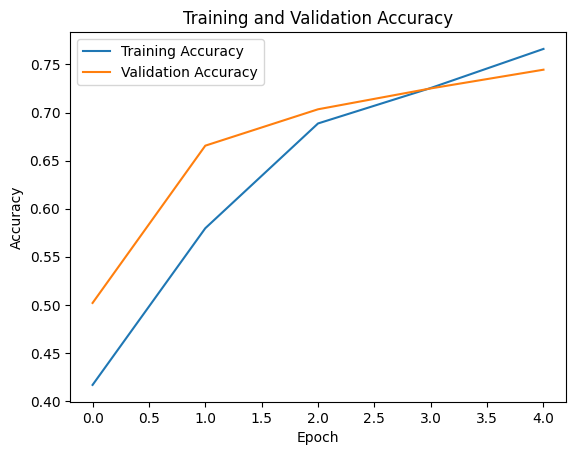

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
num_classes=max(train_labels)+1
print(f" Number of news categories (classes):{num_classes}")
max_newggswire_length = 200


train_data = pad_sequences(train_data, maxlen=max_newswire_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_newswire_length, padding='post', truncating='post')
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)


vocab_size = 10000
embedding_dim = 128
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_newswire_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
# Print model summary
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.2,)

loss = accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss[0]}, Test Accuracy: {loss[1]}")


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Training and Validation Accuracy')
plt.show()
